In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
print(f'Le fichier a {data.shape[0]} lignes et {data.shape[1]} colonnes')

Le fichier a 569 lignes et 33 colonnes


In [ ]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [ ]:
data.dtypes.value_counts()

float64    31
int64       1
object      1
dtype: int64

In [ ]:
print('Diagnosis')
print(data['diagnosis'].value_counts())
print(data['diagnosis'].value_counts(normalize=True))

Diagnosis
B    357
M    212
Name: diagnosis, dtype: int64
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
data['diagnosis'] = data['diagnosis'].replace({'B': 0, 'M': 1})

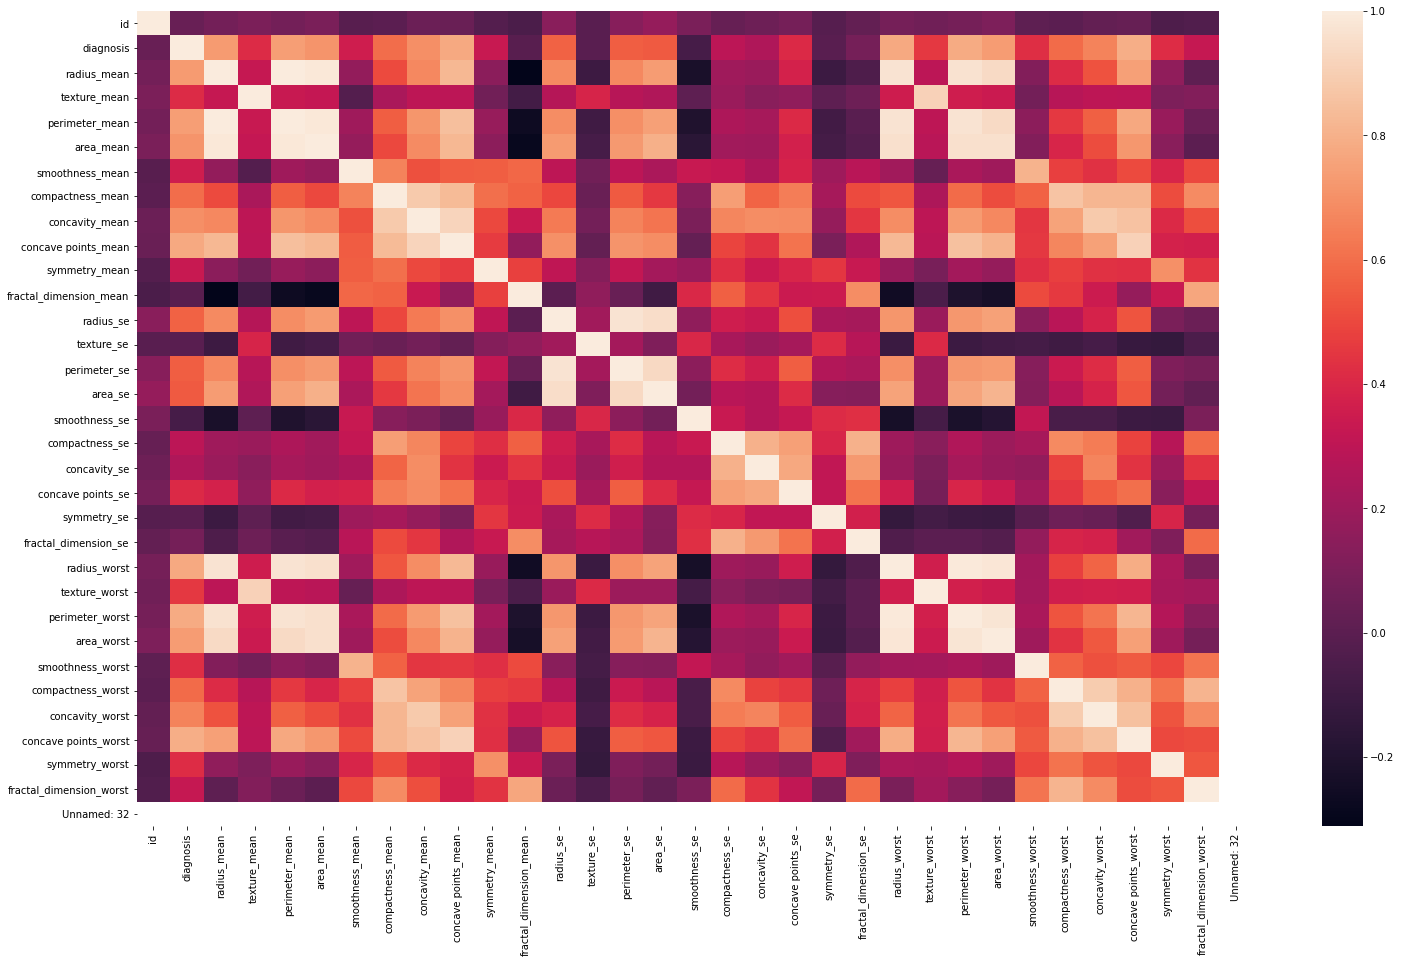

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(data.corr())

In [ ]:
print("Most important features relative to target")
corr = data.corr()
corr.sort_values(["diagnosis"], ascending = False, inplace = True)
print(corr.diagnosis)

Most important features relative to target
diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se 

<Figure size 3600x1440 with 0 Axes>

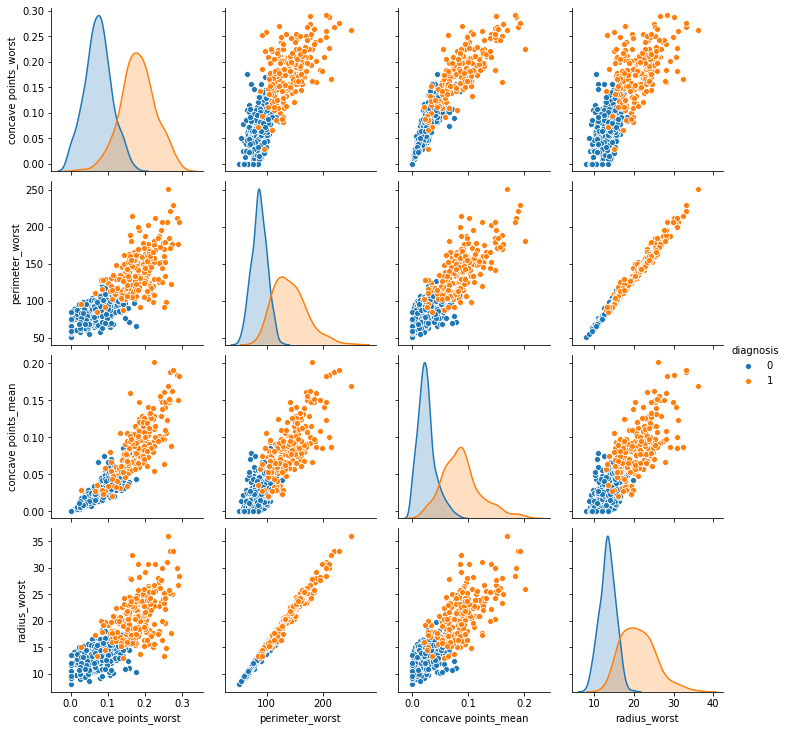

In [ ]:
plt.figure(figsize=(50,20))
sns.pairplot(data[['diagnosis','concave points_worst','perimeter_worst','concave points_mean','radius_worst']], hue='diagnosis')

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [ ]:
data.drop(['id','Unnamed: 32'], axis=1, inplace=True)

int_float = data.select_dtypes(['int','float']).columns[1:]

In [ ]:
int_float

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
data[int_float] = StandardScaler().fit_transform(data[int_float])
# data['diagnosis'] = OrdinalEncoder().fit_transform(data['diagnosis'].values.reshape(-1,1))

In [ ]:
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
y = data['diagnosis']
X = data.drop('diagnosis',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(f'Shape :\nX_train : {X_train.shape}\nX_test : {X_test.shape}\ny_train : {y_train.shape}\ny_test : {y_test.shape}')

Shape :
X_train : (512, 30)
X_test : (57, 30)
y_train : (512,)
y_test : (57,)


In [ ]:
model_1 = AdaBoostClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = RandomForestClassifier(random_state=0)
model_4 = SVC(random_state=0)
model_5 = KNeighborsClassifier()
model_6 = LogisticRegression(random_state=0)
model_7 = GradientBoostingClassifier(random_state=0)
model_8 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),n_estimators=100)
model_9 = xgb.XGBClassifier(random_state=0)

dict_models = {'AdaBoostClassifier':model_1,
               'DecisionTreeClassifier':model_2,
               'RandomForestClassifier':model_3,
               'SVC':model_4,
               'KNeighborsClassifier_hp':model_5,
               'LogisticRegression':model_6,
               'GradientBoostingClassifier':model_7,
               'BaggingClassifier':model_8,
               'XGBClassifier':model_9}

liste = []
for name, model in dict_models.items():
  precision = cross_val_score(model,X_train, y_train, cv=4).mean()
  liste.append([name, precision])

for elt in liste:
  print(f'{elt[0]} -> {elt[1]*100}%\n')

AdaBoostClassifier -> 95.1171875%

DecisionTreeClassifier -> 91.2109375%

RandomForestClassifier -> 95.8984375%

SVC -> 97.265625%

KNeighborsClassifier_hp -> 96.2890625%

LogisticRegression -> 97.65625%

GradientBoostingClassifier -> 96.09375%

BaggingClassifier -> 96.09375%

XGBClassifier -> 96.09375%



In [ ]:
# corr = data.corr()
# corr.sort_values(["diagnosis"], ascending = False, inplace = True)

# precedent = corr.diagnosis.index[1:11][0]
# for indice, nom in enumerate(corr.diagnosis.index[1:11]): 
#   print(precedent, nom)
#   X_train[f'tentative_{indice}'] = X_train[precedent] + X_train[nom]
#   precedent = nom

In [ ]:
# model_1 = AdaBoostClassifier(random_state=0)
# model_2 = DecisionTreeClassifier(random_state=0)
# model_3 = RandomForestClassifier(random_state=0)
# model_4 = SVC(random_state=0)
# model_5 = KNeighborsClassifier()
# model_6 = LogisticRegression(random_state=0)
# model_7 = GradientBoostingClassifier(random_state=0)
# model_8 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),n_estimators=100)
# model_9 = xgb.XGBClassifier(random_state=0)

# dict_models = {'AdaBoostClassifier':model_1,
#                'DecisionTreeClassifier':model_2,
#                'RandomForestClassifier':model_3,
#                'SVC':model_4,
#                'KNeighborsClassifier_hp':model_5,
#                'LogisticRegression':model_6,
#                'GradientBoostingClassifier':model_7,
#                'BaggingClassifier':model_8,
#                'XGBClassifier':model_9}

# liste = []
# for name, model in dict_models.items():
#   precision = cross_val_score(model,X_train, y_train, cv=4).mean()
#   liste.append([name, precision])

# for elt in liste:
#   print(f'{elt[0]} -> {elt[1]*100}%\n')

In [ ]:
from sklearn.feature_selection import RFECV

selector = RFECV(model_6, step=1, min_features_to_select=3, cv=4)
selector.fit(X_train, y_train)
print(selector.ranking_)
print(selector.grid_scores_)
print(X_train.iloc[:,selector.ranking_ == 1].columns)

X_train = X_train[X_train.iloc[:,selector.ranking_ == 1].columns]

[ 1  1  1  1  8  1  1  1 11  5  1  7  1  1  6  1  9  3  2  1  1  1  1  1
  1 10  1  1  1  4]
[0.93164062 0.93945312 0.94921875 0.95703125 0.95898438 0.95898438
 0.95898438 0.95898438 0.95898438 0.96679688 0.96484375 0.97070312
 0.97070312 0.96679688 0.97070312 0.97070312 0.97460938 0.9765625
 0.9765625  0.97460938 0.97460938 0.97460938 0.97460938 0.97460938
 0.97460938 0.9765625  0.9765625  0.9765625 ]
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'compactness_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


In [ ]:
model_1 = AdaBoostClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = RandomForestClassifier(random_state=0)
model_4 = SVC(random_state=0)
model_5 = KNeighborsClassifier()
model_6 = LogisticRegression(random_state=0)
model_7 = GradientBoostingClassifier(random_state=0)
model_8 = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0),n_estimators=100)
model_9 = xgb.XGBClassifier(random_state=0)

dict_models = {'AdaBoostClassifier':model_1,
               'DecisionTreeClassifier':model_2,
               'RandomForestClassifier':model_3,
               'SVC':model_4,
               'KNeighborsClassifier_hp':model_5,
               'LogisticRegression':model_6,
               'GradientBoostingClassifier':model_7,
               'BaggingClassifier':model_8,
               'XGBClassifier':model_9}

liste = []
for name, model in dict_models.items():
  precision = cross_val_score(model,X_train, y_train, cv=4).mean()
  liste.append([name, precision])

for elt in liste:
  print(f'{elt[0]} -> {elt[1]*100}%\n')

AdaBoostClassifier -> 95.8984375%

DecisionTreeClassifier -> 92.578125%

RandomForestClassifier -> 96.484375%

SVC -> 97.265625%

KNeighborsClassifier_hp -> 96.875%

LogisticRegression -> 97.8515625%

GradientBoostingClassifier -> 95.703125%

BaggingClassifier -> 96.2890625%

XGBClassifier -> 96.09375%



In [ ]:
from sklearn.model_selection import GridSearchCV

model_6

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
hyper_params = {"C" : np.linspace(0,5,11), 
                "penalty" : ["l1","l2"]}
                # {'C': 0.5, 'penalty': 'l2'} 0.98046875

grid = GridSearchCV(model_6, hyper_params, cv=4)

grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:935: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1. / C, sample_weight),
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:124: RuntimeWarning: invalid value encountered in double_scalars
  out = -np.sum(sample_weight * log_logistic(yz)) + .5 * alpha * np.dot(w, w)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:129: RuntimeWarning: invalid value encountered in multiply
  grad[:n_features] = safe_sparse_dot(X.T, z0) + alpha * w
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarn

{'C': 0.5, 'penalty': 'l2'}
0.98046875


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
